In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df["Sex"] = pd.factorize(df['Sex'])[0].astype(np.uint8)
df["BP"] = pd.factorize(df['BP'])[0].astype(np.uint8)
df["Cholesterol"] = pd.factorize(df['Cholesterol'])[0].astype(np.uint8)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [7]:
df['Cholesterol'].unique()

array([0, 1], dtype=uint8)

In [8]:
X = df.drop(columns = ['Drug'])
y = df[["Drug"]]
X[0:5], y[0:5]

(   Age  Sex  BP  Cholesterol  Na_to_K
 0   23    0   0            0   25.355
 1   47    1   1            0   13.093
 2   47    1   1            0   10.114
 3   28    0   2            0    7.798
 4   61    0   1            0   18.043,
     Drug
 0  DrugY
 1  drugC
 2  drugC
 3  drugX
 4  DrugY)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160, 1), (40, 1))

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

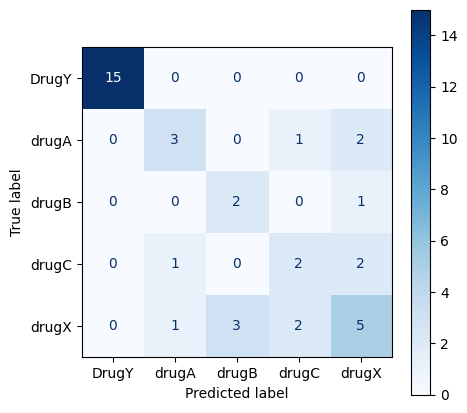

In [11]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(knn_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators=10 , max_features='auto',random_state=101)
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

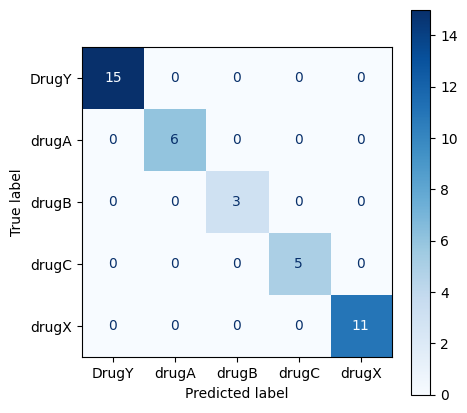

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(random_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Save the model as pickle

In [14]:
import pickle
pickle.dump(random_model, open('drugs_model.pkl', 'wb'))

## Load saved pickled model

In [15]:
# some time later...
# load the model from disk
pickled_model = pickle.load(open('drugs_model.pkl', 'rb'))
pickled_model.predict(X_test)

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

## Test a single input array value

In [16]:
import numpy as np
lst = [25,  1,  0,  0, 49]
int_features = []
#int_features = int_features.append(lst)
int_features = lst
arr = np.array(int_features)
#arr = np.arange(arr)
arr = arr.reshape(1, 5)
print(arr)
pickled_model.predict(arr)

[[25  1  0  0 49]]


array(['DrugY'], dtype=object)